In [1]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils

In [2]:
def folder_path(img_id, resolution, length):
    return f"output/contact_loss_lma/470-470-{length}/{img_id}/unrefined/{resolution}/nan/"

In [3]:
dpi=1200

### Convergence Study

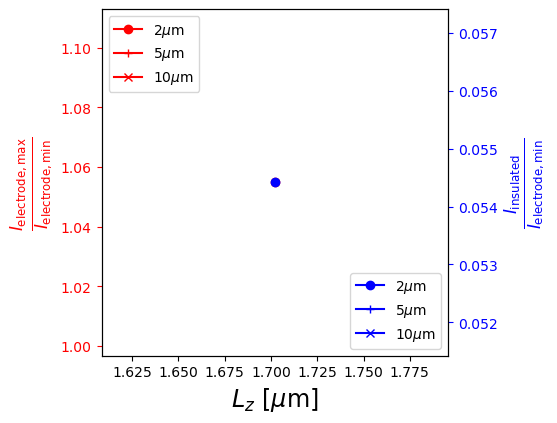

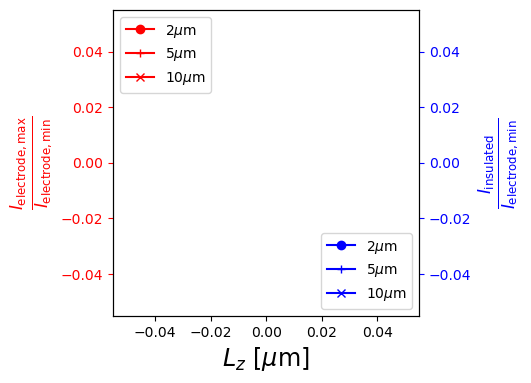

In [4]:
name_of_study = 'contact_loss_lma'
utils.make_dir_if_missing(f"figures/{name_of_study}")
img_ids = {6: 98.41, 11: 36.38, 16: 6.3, 22: 0.45}
resolutions = [2, 5, 10]
res_markers_1 = ['ro-', 'r+-', 'rx-']
res_markers_2 = ['bo-', 'b+-', 'bx-']
lengths = [1, 5, 15, 30, 50]


new_lengths = [length * 800/470 for length in lengths]
fig0, ax0 = plt.subplots(figsize=(5, 4.5))
fig1, ax1 = plt.subplots(figsize=(5, 4.5))
ax = [ax0, ax1]
ax0.yaxis.label.set_color('red')
ax1.yaxis.label.set_color('red')
ax_r = [ax0.twinx(), ax1.twinx()]
ax_r[0].yaxis.label.set_color('blue')
ax_r[1].yaxis.label.set_color('blue')
ax0.tick_params(axis='y', colors='red')
ax1.tick_params(axis='y', colors='red')
ax_r[0].tick_params(axis='y', colors='blue')
ax_r[1].tick_params(axis='y', colors='blue')
ax[0].set_xlabel(r'$L_z$' + ' ' + r'[$\mu$m]', fontdict={'fontsize': 'xx-large'})
ax[1].set_xlabel(r'$L_z$' + ' ' + r'[$\mu$m]', fontdict={'fontsize': 'xx-large'})
ax[0].set_ylabel(r'$\frac{I_{\mathrm{electrode,max}}}{I_{\mathrm{electrode,min}}}$', fontdict={'fontsize': 'xx-large'})
ax[1].set_ylabel(r'$\frac{I_{\mathrm{electrode,max}}}{I_{\mathrm{electrode,min}}}$', fontdict={'fontsize': 'xx-large'})

ax_r[0].set_ylabel(r'$\frac{I_{\mathrm{insulated}}}{I_{\mathrm{electrode,min}}}$', fontdict={'fontsize': 'xx-large'})
ax_r[1].set_ylabel(r'$\frac{I_{\mathrm{insulated}}}{I_{\mathrm{electrode,min}}}$', fontdict={'fontsize': 'xx-large'})

for img_id in [11, 22]:
    ax_id = 0 if img_id == 11 else 1
    for idx, resolution in enumerate(resolutions):
        electrode_current_ratios = []
        insulated_current_ratios = []
        for length in lengths:
            try:
                simulation_metafile = os.path.join(folder_path(img_id, resolution, length), "simulation.json")
                with open(simulation_metafile, "r") as fp:
                    data = json.load(fp)
                electrode_current_ratio = float(data["Max electrode current over min electrode current (error)"])
                insulated_current_ratio = float(data["Insulated current over min electrode current (error)"])
                electrode_current_ratios.append(electrode_current_ratio)
                insulated_current_ratios.append(insulated_current_ratio)
            except FileNotFoundError:
                electrode_current_ratios.append(np.nan)
                insulated_current_ratios.append(np.nan)
            except KeyError:
                electrode_current_ratios.append(np.nan)
                insulated_current_ratios.append(np.nan)
        ax[ax_id].plot(new_lengths, electrode_current_ratios, res_markers_1[idx], label=f'{resolution}' + r'$\mu$m')
        ax_r[ax_id].plot(new_lengths, insulated_current_ratios, res_markers_2[idx], label=f'{resolution}' + r'$\mu$m')
# ax[0].set_title(r'$\frac{A}{A_0}$ = 36.38%', fontdict={'fontsize': 'xx-large'})
# ax[1].set_title(r'$\frac{A}{A_0}$ = 0.45%', fontdict={'fontsize': 'xx-large'})
ax[0].legend(loc="upper left")
ax[1].legend(loc="upper left")
ax_r[0].legend(loc="lower right")
ax_r[1].legend(loc="lower right")
ax[0].set_box_aspect(1)
ax[1].set_box_aspect(1)
plt.tight_layout()
fig0.savefig(f'figures/{name_of_study}/convergence-11.png', bbox_inches="tight")
fig1.savefig(f'figures/{name_of_study}/convergence-22.png', bbox_inches="tight")

output/contact_loss_lma/470-470-15/11/unrefined/1/nan/simulation.json
output/contact_loss_lma/470-470-15/11/unrefined/2/nan/simulation.json
output/contact_loss_lma/470-470-15/11/unrefined/5/nan/simulation.json
output/contact_loss_lma/470-470-15/11/unrefined/10/nan/simulation.json


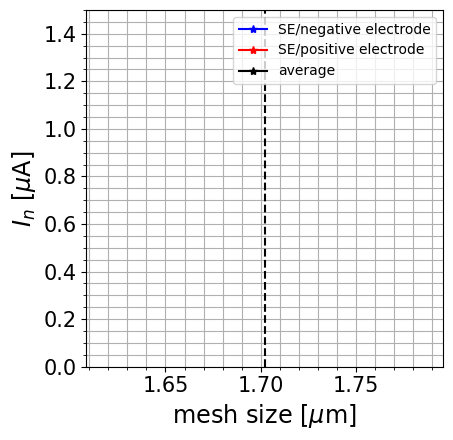

In [5]:
fig, ax = plt.subplots(figsize=(5, 4.5))
current_values_left = []
current_values_right = []
resolutions = [1, 2, 5, 10]
for resolution in resolutions:
    try:
        simulation_metafile = os.path.join(folder_path(11, resolution, 15), "simulation.json")
        print(simulation_metafile)
        with open(simulation_metafile, "r") as fp:
            data = json.load(fp)
        I_n_left = float(data["Current at active area of left electrode [A]"])
        I_n_right = float(data["Current at active area of right electrode [A]"])
        current_values_left.append(I_n_left * 1e6)
        current_values_right.append(I_n_right * 1e6)
    except FileNotFoundError:
        current_values_left.append(np.nan)
        current_values_right.append(np.nan)
current_values_avg = [0.5*(current_values_left[i] + current_values_right[i]) for i in range(len(current_values_left))]
ax.plot(resolutions, current_values_left, 'b*-', label='SE/negative electrode')
ax.plot(resolutions, current_values_right, 'r*-', label='SE/positive electrode')
ax.plot(resolutions, current_values_avg, 'k*-', label='average')
ax.set_xlabel(r'mesh size [$\mu$m]', fontdict={'fontsize': 'xx-large'})
ax.set_ylabel(r'$I_n$ [$\mu$A]', fontdict={'fontsize': 'xx-large'})
ax.axvline(x=800/470, color='k', linestyle='--')
ax.set_ylim([0, 1.5])
ax.set_box_aspect(1)
ax.minorticks_on()
ax.legend()
ax.grid(which="both")
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
fig.savefig(f'figures/{name_of_study}/grid-convergence.png', bbox_inches="tight", dpi=dpi)

In [6]:
# fig, ax = plt.subplots()
# img = plt.imread(f'{os.environ["HOME"]}/OneDrive/PhD/Data/Current_constriction/test6.tif')
# ax.imshow(img[:, :, 0])
# ax.set_box_aspect(1)
# plt.tight_layout()
# plt.savefig('figures/test6.png', dpi=1200)

In [7]:
A0 = 800e-6 ** 2  # m2
kappa = 0.1  # S/m

df = pd.read_excel('data/study_2_scaled.xlsx', sheet_name=['hi-res'])['hi-res']
df['area_fraction'] = np.around(df['area_fraction'], 4)
df['resistance [ohm]'] = (df['Lz [um]'] * 1e-6 / A0 * kappa) / df['effective_conductivity_ratio']
lengths = [1.702128, 8.5106, 85.1064, 170.2128, 340.4256]
area_fractions = [0.0045, 0.0630, 0.3638, 0.9841, 1.000]

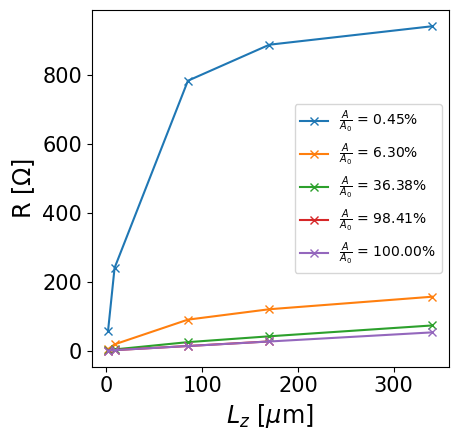

In [8]:
fig, ax = plt.subplots(figsize=(5, 4.5))
for af in area_fractions:
    df2 = df.loc[np.isclose(df['area_fraction'], af), :]
    ax.plot(df2['Lz [um]'], df2['resistance [ohm]'], 'x-', label=r"$\frac{A}{A_0}$" + f" = {100 * af:.2f}%")
ax.legend()
ax.set_xlabel(r'$L_z$ [$\mu$m]', fontdict={'fontsize': 'xx-large'});
ax.set_ylabel(r'R [$\Omega$]', fontdict={'fontsize': 'xx-large'});
ax.set_box_aspect(1)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout();
plt.savefig(f'figures/{name_of_study}/variable-length-comparison.png', bbox_inches="tight", dpi=dpi);

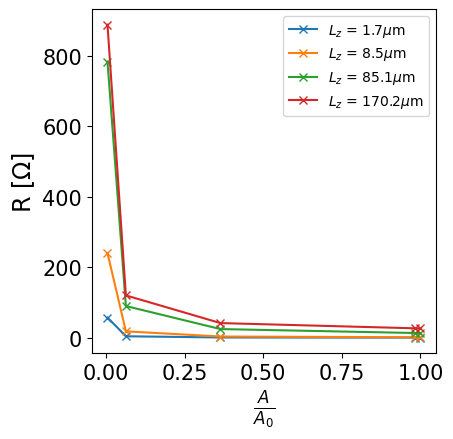

In [9]:
fig, ax = plt.subplots(figsize=(5, 4.5))
for length in lengths[:-1]:
    df2 = df.loc[np.isclose(df['Lz [um]'], length), :]
    ax.plot(df2['area_fraction'], df2['resistance [ohm]'], 'x-', label=r"$L_z$" + f" = {length:.1f}"+r'$\mu$m')
ax.legend()
ax.set_xlabel(r'$\frac{A}{A_0}$', fontdict={'fontsize': 'xx-large'});
ax.set_ylabel(r'R [$\Omega$]', fontdict={'fontsize': 'xx-large'});
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_box_aspect(1)
plt.tight_layout();
plt.savefig(f'figures/{name_of_study}/variable-area-comparison.png', bbox_inches="tight", dpi=dpi);

In [10]:
# fig, ax = plt.subplots(2, 2)
# for i, idx in enumerate([6, 11, 16, 22]):
#     img = plt.imread(f'data/current_constriction/test{idx}.tif')[:, :, 0]
#     ax[int(i/2), i % 2].imshow(img, cmap='gray')
#     ax[int(i/2), i % 2].title.set_text(r"$\frac{A}{A_0}$ = " + f"{areas[idx]} %")
#     ax[int(i/2), i % 2].title.set_color('blue')
#     ax[int(i/2), i % 2].set_xticks([])
#     ax[int(i/2), i % 2].set_yticks([])
# plt.tight_layout()
# fig.suptitle("black " + r"$\to$" + " contact lost", color='red')
# plt.savefig('figures/contact-area-maps.png', bbox_inches="tight")

In [11]:
df2 = df.loc[np.isclose(df['Lz [um]'], 1.702128)]
df3 = df.loc[np.isclose(df['Lz [um]'], 170.212766)]

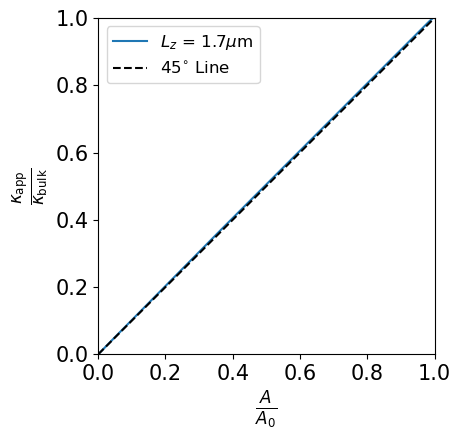

In [12]:
fig, ax = plt.subplots(figsize=(5, 4.5))
ax.plot(df2['area_fraction'], df2['effective_conductivity_ratio'], label=r'$L_z$ = 1.7$\mu$m');
ax.set_xlim([0, 1]);
ax.set_ylim([0, 1]);
ax.set_box_aspect(1);
ax.plot([0, 1], [0, 1], '--', color='k', label=r'45$^{\circ}$ Line');
ax.legend(prop={'size': 12});
ax.set_xlabel(r'$\frac{A}{A_0}$', fontdict={'fontsize': 'xx-large'});
ax.set_ylabel(r'$\frac{\kappa_\mathrm{app}}{\kappa_\mathrm{bulk}}$', fontdict={'fontsize': 'xx-large'});
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout();
plt.savefig(f'figures/{name_of_study}/short-limit-effective-conductivity-ratio.png', bbox_inches="tight", dpi=dpi);

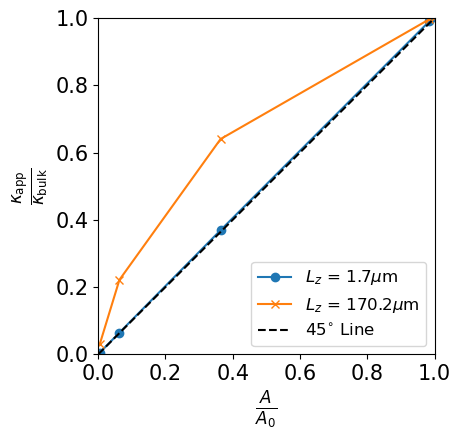

In [13]:
fig, ax = plt.subplots(figsize=(5, 4.5))
ax.plot(df2['area_fraction'], df2['effective_conductivity_ratio'], 'o-', label=r'$L_z$ = 1.7$\mu$m');
ax.plot(df3['area_fraction'], df3['effective_conductivity_ratio'], 'x-', label=r'$L_z$ = 170.2$\mu$m');
ax.set_xlim([0, 1]);
ax.set_ylim([0, 1]);
ax.set_box_aspect(1);
ax.plot([0, 1], [0, 1], '--', color='k', label=r'45$^{\circ}$ Line');
ax.legend(prop={'size': 12})
ax.set_xlabel(r'$\frac{A}{A_0}$', fontdict={'fontsize': 'xx-large'})
ax.set_ylabel(r'$\frac{\kappa_\mathrm{app}}{\kappa_\mathrm{bulk}}$', fontdict={'fontsize': 'xx-large'})
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout();
ax.set_box_aspect(1)
plt.savefig(f'figures/{name_of_study}/short-limit-effective-conductivity-ratio.png', bbox_inches="tight", dpi=dpi)

In [14]:
# image_ids = [11, 16]
# wa_numbers = [0.001, 0.01, 0.1, 0.35, 0.75, 1.0, 3.5, 7.5, 10, 100.0, 1000.0]

# df_cols = ['Wa', "area_fraction", "i_left [A/m2]", "i_right [A/m2]", "stdev_left [A/m2]", "stdev_right [A/m2]", "resistance [ohm.cm2]", "voltage_drop [V]"]

# cols = (
#     "Wagner number",
#     "Contact area fraction at left electrode",
#     "Average current density at active area of left electrode [A.m-2]",
#     "Average current density at active area of right electrode [A.m-2]",
#     "STDEV current density left electrode [A/m2]",
#     "STDEV current density right electrode [A/m2]",
#     "Total resistance [Ω.cm2]",
#     "Voltage drop [V]", 
# )

# for img_id in image_ids:
#     fig, ax = plt.subplots(1, 3, figsize=(15, 4.5))
#     dicts = []
#     for wa_num in wa_numbers:
#         simulation_metafile = os.path.join(f"output/contact_loss_lma/470-470-1/{img_id}/0.5/{wa_num}", "simulation.json")
#         f = open(simulation_metafile, "r", encoding='utf-8')
#         data = json.load(f)
#         f.close()
#         val = {}
#         for idx, col in enumerate(cols):
#             val[df_cols[idx]] = data[col]
#         dicts.append(val)
#     df = pd.DataFrame(dicts, dtype=float)
#     area_fraction = df["area_fraction"][0] * 100
#     ax[0].plot(df["Wa"], df["stdev_left [A/m2]"] / df["i_left [A/m2]"])
#     ax[0].set_title("Left")
#     ax[1].plot(df["Wa"], df["stdev_right [A/m2]"] / df["i_right [A/m2]"])
#     ax[1].set_title("Right")
#     ax[2].plot(df["Wa"], df["resistance [ohm.cm2]"])
#     ax[2].set_title(r"$R_{\Omega}A_0$")
#     ax[0].set_xscale('log')
#     ax[1].set_xscale('log')
#     ax[2].set_xscale('log')
#     ax[0].set_xlabel('Wa')
#     ax[0].set_ylabel(r'$\frac{\sigma_i}{\mu_i}$', fontsize='xx-large')
#     ax[1].set_xlabel('Wa', fontsize='xx-large')
#     ax[1].set_ylabel(r'$\frac{\sigma_i}{\mu_i}$', fontsize='xx-large')
#     ax[2].set_xlabel('Wa', fontsize='xx-large')
#     ax[2].set_ylabel(r'R$_{\mathrm{total}}$' + ' [' + r'$\Omega \mathrm{cm}^2$' + ']', fontsize='xx-large')
#     fig.suptitle(r"$\frac{A}{A_0}$" + f' = {area_fraction:.1f}%', fontsize='xx-large')
#     plt.tight_layout()
#     utils.make_dir_if_missing("figures/contact_loss_lma/kinetics")
#     plt.savefig(f'figures/contact_loss_lma/kinetics/{img_id}-1.png');
#     plt.close()


In [15]:
area_fractions = {6: 98.41, 11: 36.38, 16: 6.3, 22: 0.45}
max_cd = {1: 65, 5: 25, 15: 25, 30: 25, 50: 25, 100: 25}
norm_current = {
    1: 60,
    5: 15,
    15: 5,
    30: 5,
    50: 5,
    100: 2.5,
}
DIMENSIONS = ['470-470-' + str(v) for v in [1, 5, 15, 30, 50, 100]]
IMAGE_IDS = [6, 11, 16, 22]
AREA_FRACTIONS = [0.01, 0.4, 0.75]

In [16]:
def average_current_density(csv_data_path):
    data = pd.read_csv(csv_data_path)
    i_left = data['vleft [A/m2]'].to_numpy()
    i_right = data['vright [A/m2]'].to_numpy()
    f_left = data['freql'].to_numpy()
    f_right = data['freqr'].to_numpy()
    i_avg = 0.5 * (i_left + i_right)
    i_avg_left = np.dot(f_left, i_left)
    i_avg_right = np.dot(f_right, i_right)
    return i_avg_left, i_avg_right

In [17]:
def drop_leading_and_ending_columns_containing_zero_frequency(arr):
    leading_idx_start = 0
    leading_idx_end = 0
    ending_idx_start = -1
    ending_idx_end = -1
    break_from_leading = False
    
    while not break_from_leading:
        if not np.isclose(arr[leading_idx_end, 1], 0, atol=1e-3):
            break_from_leading = True
            break
        leading_idx_end += 1
    break_from_leading = False
    while not break_from_leading:
        if not np.isclose(arr[ending_idx_start, 1], 0, atol=1e-3):
            break_from_leading = True
            break
        ending_idx_start -= 1
    arr_out = np.zeros((arr.shape[0]+ending_idx_start - leading_idx_end, 2))
    for idx, i in enumerate(range(leading_idx_end, arr.shape[0] + ending_idx_start)):
        arr_out[idx, :] = arr[i, :]
    return arr_out

In [18]:
def i_star(kappa, lz, deltav):
    return kappa * deltav / lz

def get_frequency_csv_path(name_of_study, dimensions, resolution, img_id=None, eps=None):
    if eps is None and img_id is None:
        raise ValueError("Both img_id and eps cannot be `None`.")
    if img_id is None and name_of_study == 'contact_loss_lma':
        raise ValueError(f"img_id cannot be `None` for {name_of_study}")
    if eps is None and name_of_study == 'contact_loss_ref':
        raise ValueError(f"eps cannot be `None` for {name_of_study}")
    if eps is None:
        # return os.path.join('output', name_of_study, dimensions, str(img_id), str(resolution))
        return os.path.join('data', f'frequency-{img_id}-{dimensions.split("-")[2]}.csv')

    return os.path.join('output', name_of_study, str(eps), dimensions, str(resolution), 'frequency.csv')


def get_csv_data(csv_data_path):
    data = pd.read_csv(csv_data_path)
    try:
        arr1 = data[['vleft [A/m2]', 'freql [sq. m]']].to_numpy()
        arr1[:, 1] = arr1[:, 1] / (800e-6 * 800e-6)
        arr2 = data[['vleft [A/m2]', 'freqr [sq. m]']].to_numpy()
        arr2[:, 1] = arr2[:, 1] / (800e-6 * 800e-6)
    except KeyError:
        i_left = data['vleft [A/m2]'].to_numpy()
        i_right = data['vright [A/m2]'].to_numpy()
        f_left = data['freql'].to_numpy()
        f_right = data['freqr'].to_numpy()
        i_mid = 0.5 * (i_left + i_right)
        i_avg_left = np.dot(f_left, i_mid)
        i_avg_right = np.dot(f_right, i_mid)
        arr1 = np.zeros((i_left.shape[0], 2))
        arr2 = np.zeros((i_right.shape[0], 2))
        arr1[:, 0] = 2 * i_mid / i_avg_left
        arr1[:, 1] = f_left
        arr2[:, 0] = 2 * i_mid / i_avg_right
        arr2[:, 1] = f_right
    return arr1, arr2


def make_plot_left(name_of_study, dimensions, resolution=1, img_id=None, eps=None):
    
    if eps is None:
        text_idx = area_fractions[img_id]
        _eps = text_idx
    else:
        text_idx = eps * 100
        _eps = eps * 100
    freq_csv_path = get_frequency_csv_path(name_of_study, dimensions, resolution, img_id, eps)
    data = pd.read_csv(freq_csv_path)
    Lz = int(dimensions.split("-")[2])
    i_min = i_star(kappa=0.1, lz=Lz*(800/470)*1e-6, deltav=1e-3)
    ######
    i_left = data['vleft [A/m2]'].to_numpy()
    i_right = data['vright [A/m2]'].to_numpy()
    try:
        f_left = data['freql'].to_numpy()
    except:
        f_left = data['freql [sq. m]'].to_numpy() / (800e-6 * 800e-6)
    i_mid = 0.5 * (i_left + i_right)
    arr = np.zeros((i_left.shape[0], 2))
    arr[:, 0] = i_mid / i_min
    arr[:, 1] = f_left
    # clean up
    arr = drop_leading_and_ending_columns_containing_zero_frequency(arr)
    fig, ax = plt.subplots()
    ax.plot(arr[:, 0], arr[:, 1], 'bo-', markersize=2.5);
    ax.set_ylabel('frequency', fontdict={'fontsize': 'xx-large'})
    ax.set_xlabel(r'$\hat{i}$', fontdict={'fontsize': 'xx-large'})
    ax.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
    ax.axvline(x=1, color='k', linestyle='--', linewidth=0.5)
    ax.minorticks_on();
    ax.tick_params(which="both", left=True, right=True, bottom=True, top=True, labelleft=True, labelright=False, labelbottom=True, labeltop=False, labelsize=15)
    plt.tight_layout();
    plt.savefig(f'figures/{name_of_study}/frequency-left-{text_idx}-{Lz}.png', dpi=dpi);
    # plt.close()


def make_plot_right(name_of_study, dimensions, resolution=1, img_id=None, eps=None):
    if eps is None:
        text_idx = area_fractions[img_id]
    else:
        text_idx = eps * 100
    freq_csv_path = get_frequency_csv_path(name_of_study, dimensions, resolution, img_id, eps)
    data = pd.read_csv(freq_csv_path)
    Lz = int(dimensions.split("-")[2])
    i_max = i_star(kappa=0.1, lz=Lz*(800/470)*1e-6, deltav=1e-3)
    ######
    i_left = data['vleft [A/m2]'].to_numpy()
    i_right = data['vright [A/m2]'].to_numpy()
    try:
        f_right = data['freqr'].to_numpy()
    except:
        f_right = data['freqr [sq. m]'].to_numpy() / (800e-6 * 800e-6)
    i_mid = 0.5 * (i_left + i_right)
    arr = np.zeros((i_right.shape[0], 2))
    arr[:, 0] = i_mid / i_max
    arr[:, 1] = f_right
    ######
    # clean up
    arr = drop_leading_and_ending_columns_containing_zero_frequency(arr)
    fig, ax = plt.subplots()
    ax.plot(arr[:, 0], arr[:, 1], 'ro-', markersize=2.5);
    ax.set_ylabel('frequency', fontdict={'fontsize': 'xx-large'})
    ax.set_xlabel(r'$\hat{i}$', fontdict={'fontsize': 'xx-large'})
    ax.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
    ax.axvline(x=1, color='k', linestyle='--', linewidth=0.5)
    ax.minorticks_on();
    ax.tick_params(which="both", left=True, right=True, bottom=True, top=True, labelleft=True, labelright=False, labelbottom=True, labeltop=False, labelsize=15)
    plt.tight_layout()
    plt.savefig(f'figures/{name_of_study}/frequency-right-{text_idx}-{Lz}.png', dpi=dpi)
    # plt.close()


def moments(name_of_study, dimensions, resolution=1, img_id=None, eps=None):
    freq_csv_path = get_frequency_csv_path(name_of_study, dimensions, resolution, img_id, eps)
    data = pd.read_csv(freq_csv_path)
    avg_val = 0.5 * (data[['vleft [A/m2]']].to_numpy() + data[['vright [A/m2]']].to_numpy())
    try:
        final = np.hstack((avg_val, data[['freql [sq. m]']].to_numpy() / (800e-6 * 800e-6), data[['freqr [sq. m]']].to_numpy() / (800e-6 * 800e-6)))
    except KeyError:
        final = np.hstack((avg_val, data[['freql']].to_numpy(), data[['freqr']].to_numpy()))
    mu_left = np.dot(final[:, 0], final[:, 1])
    mu_right = np.dot(final[:, 0], final[:, 2])
    sd_left = np.sqrt(np.dot((final[:, 0] - mu_left)**2, final[:, 1]))
    sd_right = np.sqrt(np.dot((final[:, 0] - mu_right)**2, final[:, 2]))
    stats = {"mu_left": mu_left, "sd_left": sd_left, "mu_right": mu_right, "sd_right": sd_right}
    return stats, final

### Frequency Distribution of Current Density for Thickness and Active Area Fraction

In [19]:
name_of_study = 'contact_loss_lma'
df = pd.read_csv('data/current-density-zero-right.csv')
df.head(), df.columns

(   Thickness, Lz [um]  Left Active Area, A/A0  Fraction of A0 (i ≈ 0)
 0                 1.7                   36.38                   54.36
 1                 1.7                    6.30                   90.42
 2                 1.7                    0.45                   99.24
 3                85.0                   36.38                    1.00
 4                85.0                    6.30                   22.64,
 Index(['Thickness, Lz [um]', 'Left Active Area, A/A0',
        'Fraction of A0 (i ≈ 0)'],
       dtype='object'))

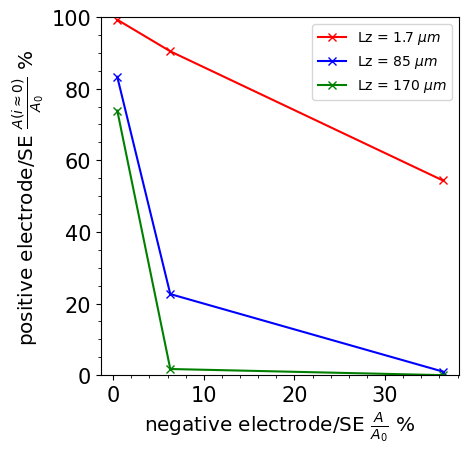

In [20]:
fig, ax = plt.subplots(figsize=(5, 4.5))
colors = {'rx-': 1.7, 'bx-': 85, 'gx-': 170}
data_arr = np.array(df.to_numpy(), dtype=float)
for c, v in colors.items():
    data = data_arr[np.isclose(data_arr[:, 0], v), :]
    ax.plot(data[:, 1], data[:, 2], c, label=f'Lz = {v} ' + r'$\mu m$')
ax.set_xlabel(r'negative electrode/SE $\frac{A}{A_0}$ %', fontsize='x-large')
ax.set_ylabel(r'positive electrode/SE $\frac{A(i \approx 0)}{A_0}$ %', fontsize='x-large')
ax.legend(loc="upper right", prop={'size': 10})
plt.tight_layout()
ax.set_box_aspect(1)
ax.set_ylim([0, 100])
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig(f'figures/{name_of_study}/current_density_zero_right.png', bbox_inches="tight", dpi=dpi)
# plt.close()

In [21]:

utils.make_dir_if_missing(f'figures/{name_of_study}')
moments_data = []
# styles = ['k-', 'r-', 'b-', 'r-.', 'b-.', 'g-'][1:]
styles = ['k-', 'r-', 'b-', 'r-.', 'b-.', 'g-', 'r--', 'b--', 'k-.']
for img_id in IMAGE_IDS:
    # fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    # fig.suptitle(r'$\frac{A}{A_0}$' + f' = {area_fractions[img_id]}%')
    for idx, dimensions in enumerate(['470-470-' + str(v) for v in [1, 15, 30, 100]]):
        Lz = int(dimensions.split("-")[2])
        try:
            stats, final = moments(name_of_study, dimensions, resolution=1, img_id=img_id, eps=None)
        except FileNotFoundError:
            print(f"File not found for {dimensions} and img_id {img_id}")
            continue
        mu_left = stats['mu_left']
        sd_left = stats['sd_left']
        mu_right = stats['mu_right']
        sd_right = stats['sd_right']
        z_left = (final[:, 0] - mu_left) / sd_left
        z_right = (final[:, 0] - mu_right) / sd_right
        moments_data.append((Lz, img_id, mu_left, sd_left, mu_right, sd_right))
#         ax[0].plot(z_left, final[:, 1], styles[idx], label=f'{Lz*800/470:.1f}' + r' $\mu m$')
#         ax[1].plot(z_right, final[:, 2], styles[idx], label=f'{Lz*800/470:.1f}' + r' $\mu m$')
#     ax[0].set_xlim([-3, 3])
#     ax[1].set_xlim([-3, 3])
#     # ax[0].set_ylim([0, 1])
#     # ax[1].set_ylim([0, 1])
#     ax[0].grid(True, which='both');
#     ax[0].minorticks_on();
#     ax[1].grid(True, which='both');
#     ax[1].minorticks_on();
#     ax[0].set_xlabel(r'$\frac{i-\mu_i}{\sigma_i}$', fontsize='xx-large')
#     ax[1].set_xlabel(r'$\frac{i-\mu_i}{\sigma_i}$', fontsize='xx-large')
#     ax[0].set_ylabel('frequency')
#     ax[1].set_ylabel('frequency')
#     # fig.legend(['left', 'right'])
#     ax[0].legend();
#     ax[1].legend();
#     # ax[0].set_yscale('log');
#     # ax[1].set_yscale('log');
#     plt.tight_layout();
#     plt.savefig(f'figures/{name_of_study}/current-density-moments-image-{img_id}.png');
#     # plt.close();


/tmp/ipykernel_117963/354601126.py:20: RuntimeWarning: divide by zero encountered in divide
  z_right = (final[:, 0] - mu_right) / sd_right
/tmp/ipykernel_117963/354601126.py:20: RuntimeWarning: invalid value encountered in divide
  z_right = (final[:, 0] - mu_right) / sd_right


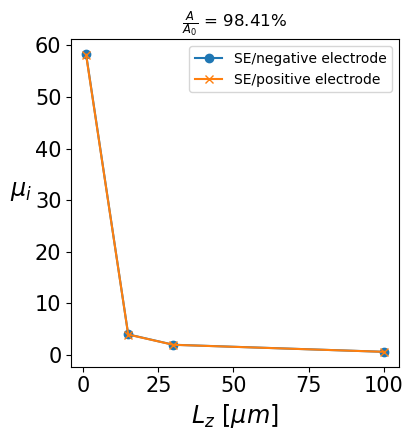

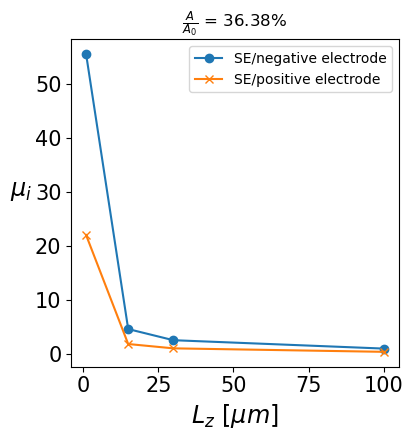

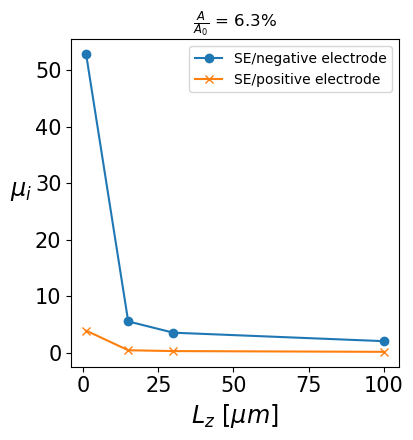

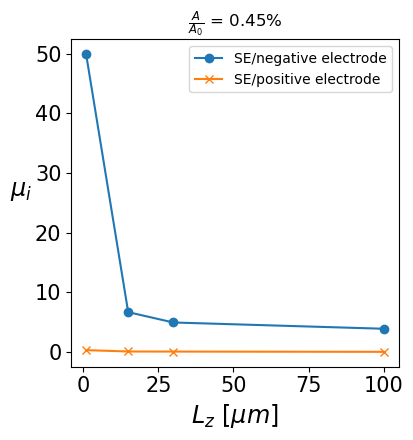

In [26]:
df_new = pd.DataFrame(moments_data, columns=['Lz', 'img_id', 'mu_left', 'sd_left', 'mu_right', 'sd_right'])
for idx, img_id in enumerate(IMAGE_IDS):
    fig, ax = plt.subplots(figsize=(5, 4.5))
    df_new2 = df_new[df_new['img_id'] == img_id].to_numpy() 
    if idx == 0:
        ax.plot(df_new2[:, 0], df_new2[:, 2], 'o-', label='SE/negative electrode')
        ax.plot(df_new2[:, 0], df_new2[:, 4], 'x-', label='SE/positive electrode')
        ax.set_title(r'$\frac{A}{A_0}$ = ' + f'{area_fractions[img_id]}%')
    elif idx == 1:
        ax.plot(df_new2[:, 0], df_new2[:, 2], 'o-', label='SE/negative electrode')
        ax.plot(df_new2[:, 0], df_new2[:, 4], 'x-', label='SE/positive electrode')
        ax.set_title(r'$\frac{A}{A_0}$ = ' + f'{area_fractions[img_id]}%')
    elif idx == 2:
        ax.plot(df_new2[:, 0], df_new2[:, 2], 'o-', label='SE/negative electrode')
        ax.plot(df_new2[:, 0], df_new2[:, 4], 'x-', label='SE/positive electrode')
        ax.set_title(r'$\frac{A}{A_0}$ = ' + f'{area_fractions[img_id]}%')
    elif idx == 3:
        ax.plot(df_new2[:, 0], df_new2[:, 2], 'o-', label='SE/negative electrode')
        ax.plot(df_new2[:, 0], df_new2[:, 4], 'x-', label='SE/positive electrode')
        ax.set_title(r'$\frac{A}{A_0}$ = ' + f'{area_fractions[img_id]}%')
    else:
        continue
    ax.set_xlabel(r'$L_z$ [' + r'$\mu m$]', fontsize='xx-large')
    ax.set_ylabel(r'$\mu_i$', fontsize='xx-large', rotation='horizontal', labelpad=10)
    ax.legend()
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_box_aspect(1)
    plt.tight_layout()
    plt.savefig(f'figures/{name_of_study}/current-density-moments-means-{idx}.png', bbox_inches="tight", dpi=dpi)
# ax[0, 0].set_yscale('log')
# ax[0, 1].set_yscale('log')
# ax[1, 0].set_yscale('log')
# ax[1, 1].set_yscale('log')
# ax[0, 0].legend()
# ax[0, 0].tick_params(axis='both', which='major', labelsize=15)
# ax[1, 0].legend()
# ax[0, 1].legend()
# ax[0, 1].tick_params(axis='both', which='major', labelsize=15)
# ax[1, 1].legend()
# ax[0, 0].set_box_aspect(1)
# ax[0, 1].set_box_aspect(1)
# ax[1, 0].set_box_aspect(1)
# ax[1, 0].tick_params(axis='both', which='major', labelsize=15)
# ax[1, 1].set_box_aspect(1)
# ax[1, 1].tick_params(axis='both', which='major', labelsize=15)
# plt.tight_layout()
# plt.savefig(f'figures/{name_of_study}/current-density-moments-means.png', bbox_inches="tight", dpi=dpi)
# plt.close()

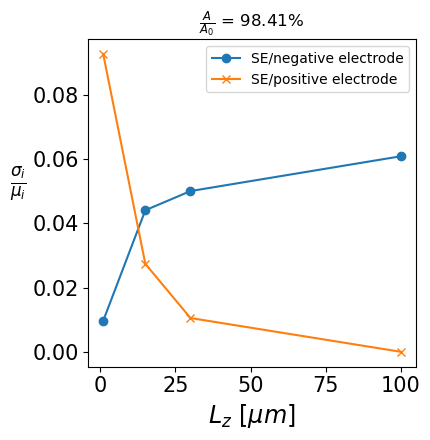

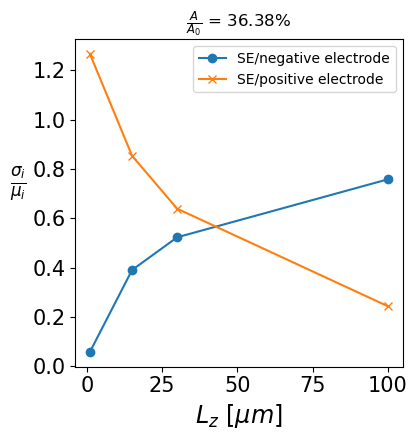

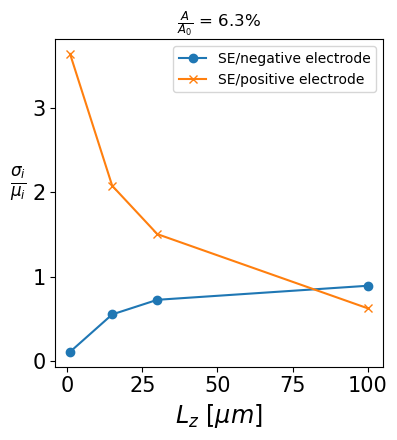

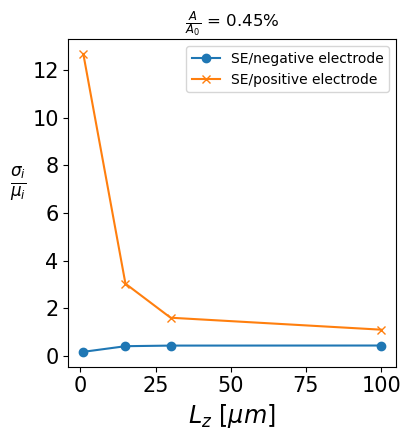

In [27]:
df_new = pd.DataFrame(moments_data, columns=['Lz', 'img_id', 'mu_left', 'sd_left', 'mu_right', 'sd_right'])
for idx, img_id in enumerate(IMAGE_IDS):
    fig, ax = plt.subplots(figsize=(5, 4.5))
    df_new2 = df_new[df_new['img_id'] == img_id].to_numpy() 
    if idx == 0:
        ax.plot(df_new2[:, 0], df_new2[:, 3] / df_new2[:, 2], 'o-', label='SE/negative electrode')
        ax.plot(df_new2[:, 0], df_new2[:, 5] / df_new2[:, 4], 'x-', label='SE/positive electrode')
        ax.set_title(r'$\frac{A}{A_0}$ = ' + f'{area_fractions[img_id]}%')
    elif idx == 1:
        ax.plot(df_new2[:, 0], df_new2[:, 3] / df_new2[:, 2], 'o-', label='SE/negative electrode')
        ax.plot(df_new2[:, 0], df_new2[:, 5] / df_new2[:, 4], 'x-', label='SE/positive electrode')
        ax.set_title(r'$\frac{A}{A_0}$ = ' + f'{area_fractions[img_id]}%')
    elif idx == 2:
        ax.plot(df_new2[:, 0], df_new2[:, 3] / df_new2[:, 2], 'o-', label='SE/negative electrode')
        ax.plot(df_new2[:, 0], df_new2[:, 5] / df_new2[:, 4], 'x-', label='SE/positive electrode')
        ax.set_title(r'$\frac{A}{A_0}$ = ' + f'{area_fractions[img_id]}%')
    elif idx == 3:
        ax.plot(df_new2[:, 0], df_new2[:, 3] / df_new2[:, 2], 'o-', label='SE/negative electrode')
        ax.plot(df_new2[:, 0], df_new2[:, 5] / df_new2[:, 4], 'x-', label='SE/positive electrode')
        ax.set_title(r'$\frac{A}{A_0}$ = ' + f'{area_fractions[img_id]}%')
    else:
        continue
    ax.set_xlabel(r'$L_z$ [' + r'$\mu m$]', fontsize='xx-large')
    ax.set_ylabel(r'$\frac{\sigma_i}{\mu_i}$', fontsize='xx-large', rotation='horizontal', labelpad=10)
    ax.legend()
    ax.set_box_aspect(1)
    ax.tick_params(axis='both', which='major', labelsize=15)
    plt.tight_layout()
    plt.savefig(f'figures/{name_of_study}/current-density-moments-{idx}.png', bbox_inches="tight", dpi=dpi)

In [ ]:
# for dimensions in DIMENSIONS:
#     for img_id in IMAGE_IDS:
#         try:
#             make_plot_left(name_of_study, dimensions, resolution=1, img_id=img_id, eps=None)
#         except FileNotFoundError:
#             print(f"No file for {dimensions}")

In [ ]:
# for dimensions in DIMENSIONS:
#     Lz = int(dimensions.split("-")[2])
#     for img_id in IMAGE_IDS:
#         try:
#             make_plot_right(name_of_study, dimensions, resolution=1, img_id=img_id, eps=None)
#         except FileNotFoundError:
#             print(f"No file for {dimensions}")

In [ ]:
def se_negative_electrode_frequency_plots(img_id, lengths=[5, 15, 30], name_of_study='contact_loss_lma', resolution=1, eps=None):
    """"""
    markers = ['ro-', 'bx-', 'g+-']
    fig, ax = plt.subplots(figsize=(5, 4.5))
    if eps is None:
        text_idx = area_fractions[img_id]
        _eps = text_idx
    else:
        text_idx = eps * 100
        _eps = eps * 100
    for idx_, length in enumerate(lengths):
        dimensions = f'470-470-{length}'
        freq_csv_path = get_frequency_csv_path(name_of_study, dimensions, resolution, img_id, eps)
        data = pd.read_csv(freq_csv_path)
        Lz = length
        i_min = i_star(kappa=0.1, lz=Lz*(800/470)*1e-6, deltav=1e-3)
        ######
        i_left = data['vleft [A/m2]'].to_numpy()
        i_right = data['vright [A/m2]'].to_numpy()
        try:
            f_left = data['freql'].to_numpy()
        except:
            f_left = data['freql [sq. m]'].to_numpy() / (800e-6 * 800e-6)
        i_mid = 0.5 * (i_left + i_right)
        arr = np.zeros((i_left.shape[0], 2))
        arr[:, 0] = i_mid / i_min
        arr[:, 1] = f_left
        # clean up
        arr = drop_leading_and_ending_columns_containing_zero_frequency(arr)
        ax.plot(arr[:, 0], arr[:, 1], markers[idx_], label=r'$L_z$ = ' + f'{Lz*(800/470):.1f}' + r'$\mu$m', markersize=2.5);
    ax.set_ylabel('frequency', fontsize='xx-large')
    ax.set_xlabel(r'$\hat{i}$', fontsize='xx-large')
    ax.minorticks_on();
    ax.set_box_aspect(1);
    # ax.set_xlim([0, 1]);
    ax.set_ylim([0, 0.7]);
    ax.legend(prop={'size': 12})
    ax.tick_params(which="both", left=True, right=True, bottom=True, top=True, labelleft=True, labelright=False, labelbottom=True, labeltop=False, labelsize=15)
    plt.tight_layout();
    plt.savefig(f'figures/{name_of_study}/frequency-se-negative-electrode.png', dpi=dpi);


def se_positive_electrode_frequency_plots(img_id, name_of_study='contact_loss_lma', resolution=1, lengths=[5, 15, 30], eps=None):
    """"""
    markers = ['ro-', 'bx-', 'g+-']
    fig, ax = plt.subplots(figsize=(5, 4.5))
    if eps is None:
        text_idx = area_fractions[img_id]
        _eps = text_idx
    else:
        text_idx = eps * 100
        _eps = eps * 100
    for idx_, length in enumerate(lengths):
        dimensions = f'470-470-{length}'
        freq_csv_path = get_frequency_csv_path(name_of_study, dimensions, resolution, img_id, eps)
        data = pd.read_csv(freq_csv_path)
        Lz = int(dimensions.split("-")[2])
        i_min = i_star(kappa=0.1, lz=Lz*(800/470)*1e-6, deltav=1e-3)
        ######
        i_left = data['vleft [A/m2]'].to_numpy()
        i_right = data['vright [A/m2]'].to_numpy()
        try:
            f_right = data['freqr'].to_numpy()
        except:
            f_right = data['freqr [sq. m]'].to_numpy() / (800e-6 * 800e-6)
        i_mid = 0.5 * (i_left + i_right)
        arr = np.zeros((i_right.shape[0], 2))
        arr[:, 0] = i_mid / i_min
        arr[:, 1] = f_right
        # clean up
        arr = drop_leading_and_ending_columns_containing_zero_frequency(arr)
        ax.plot(arr[:, 0], arr[:, 1], markers[idx_], label=r"$L_z$ = " + f"{Lz*800/470:.1f}", markersize=2.5);
    ax.set_ylabel('frequency', fontsize='xx-large')
    ax.set_xlabel(r'$\hat{i}$', fontsize='xx-large')
    ax.set_xlim([0, 1]);
    ax.set_ylim([0, 0.35]);
    ax.minorticks_on();
    ax.set_box_aspect(1);
    ax.legend(prop={'size': 12});
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(which="both", left=True, right=True, bottom=True, top=True, labelleft=True, labelright=False, labelbottom=True, labeltop=False)
    plt.tight_layout();
    plt.savefig(f'figures/{name_of_study}/frequency-se-positive-electrode.png', dpi=dpi);

In [ ]:
se_negative_electrode_frequency_plots(11, lengths=[5, 15, 30], eps=None)

In [ ]:
se_positive_electrode_frequency_plots(11, lengths=[5, 15, 30], eps=None)

In [ ]:
se_negative_electrode_frequency_plots(name_of_study='contact_loss_ref', img_id=None, lengths=[5, 15, 30], resolution=2, eps=0.4)

In [ ]:
se_positive_electrode_frequency_plots(name_of_study='contact_loss_ref', resolution=2, img_id=None, lengths=[5, 15, 30], eps=0.4)

## Contact Loss Reference

In [ ]:
# name_of_study = 'contact_loss_ref'

# utils.make_dir_if_missing(f'figures/{name_of_study}')

# for dimensions in DIMENSIONS:
#     for eps in AREA_FRACTIONS:
#         if np.isclose(eps, 0.01) and dimensions.split('-')[2] == '1':
#             resolution = 1
#         else:
#             resolution = 2
#         # if not os.path.exists(get_folder_path(name_of_study, dimensions, resolution=resolution, img_id=None, eps=eps)):
#         #     print(f"File not found for {dimensions} and area fraction {eps}")
#         #     continue
#         try:
#             make_plot_left(name_of_study, dimensions, resolution=resolution, img_id=None, eps=eps)
#         except Exception as e:
#             print(f"File not found for {dimensions} and area fraction {eps}" + str(e))
#             continue

In [ ]:
# for dimensions in DIMENSIONS:
#     for eps in AREA_FRACTIONS:
#         if np.isclose(eps, 0.01) and dimensions.split('-')[2] == '1':
#             resolution = 1
#         else:
#             resolution = 2
#         # if not os.path.exists(get_folder_path(name_of_study, dimensions, resolution=2, img_id=None, eps=eps)):
#         #     print(f"No file for {dimensions} and eps {eps}")
#         #     continue
#         try:
#             make_plot_right(name_of_study, dimensions, resolution=2, img_id=None, eps=eps)
#         except Exception as e:
#             print(f"No file for {dimensions} and eps {eps}" + str(e))
#             continue

In [ ]:
# moments_data = []
# styles = ['k-', 'r-', 'b-', 'r-.', 'b-.', 'g-', 'r--', 'b--', 'k-.']
# for eps in AREA_FRACTIONS:
#     # fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#     # fig.suptitle(r'$\frac{A}{A_0}$' + f' = {eps*100:.1f}%')
#     for idx, dimensions in enumerate(['470-470-' + str(v) for v in [1, 15, 30, 100]]):
#         Lz = int(dimensions.split("-")[2])
#         # try:
#         # if not os.path.exists(get_folder_path(name_of_study, dimensions, resolution=2, img_id=None, eps=eps)):
#         #     print(f"File not found for {dimensions} and area fraction {eps}")
#         #     continue
#         try:
#             stats, final = moments(name_of_study, dimensions, resolution=2, img_id=None, eps=eps)
#         except Exception as e:
#             print(f"File not found for {dimensions} and area fraction {eps}" + str(e))
#             continue
#         mu_left = stats['mu_left']
#         sd_left = stats['sd_left']
#         mu_right = stats['mu_right']
#         sd_right = stats['sd_right']
#         z_left = (final[:, 0] - mu_left) / sd_left
#         z_right = (final[:, 0] - mu_right) / sd_right
#         moments_data.append((Lz, eps, mu_left, sd_left, mu_right, sd_right))
# #         ax[0].plot(z_left, final[:, 1], styles[idx], label=f'{Lz*800/470:.1f}' + r' $\mu m$')
# #         ax[1].plot(z_right, final[:, 2], styles[idx], label=f'{Lz*800/470:.1f}' + r' $\mu m$')
   
# #     ax[0].grid(True, which='both');
# #     ax[0].minorticks_on();
# #     ax[1].grid(True, which='both');
# #     ax[1].minorticks_on();
# #     ax[0].set_xlabel(r'$\frac{i-\mu_i}{\sigma_i}$', fontsize='xx-large')
# #     ax[1].set_xlabel(r'$\frac{i-\mu_i}{\sigma_i}$', fontsize='xx-large')
# #     ax[0].set_ylabel('frequency')
# #     ax[1].set_ylabel('frequency')
# #     # fig.legend(['left', 'right'])
# #     ax[0].legend();
# #     ax[1].legend();
# #     # ax[0].set_yscale('log');
# #     # ax[1].set_yscale('log');
# #     ax[0].set_xlim([0, 15])
# #     ax[1].set_xlim([0, 5])
# #     plt.tight_layout();
# #     plt.savefig(f'figures/{name_of_study}/current-density-moments-image-{eps}.png', dpi=1500);

In [ ]:
# df_new = pd.DataFrame(moments_data, columns=['Lz', 'img_id', 'mu_left', 'sd_left', 'mu_right', 'sd_right'])
# fig, ax = plt.subplots(2, 2, figsize=(10, 10))
# for idx, eps in enumerate(AREA_FRACTIONS):
#     rows = np.isclose(df_new['img_id'].to_numpy(dtype=float).reshape(-1, 1), eps)
#     df_new2 = df_new.loc[rows, :].to_numpy()
#     if idx == 0:
#         ax[0, 0].plot(df_new2[:, 0], df_new2[:, 3] / df_new2[:, 2], label='left')
#         ax[0, 0].plot(df_new2[:, 0], df_new2[:, 5] / df_new2[:, 4], label='right')
#         ax[0, 0].set_title(r'$\frac{A}{A_0}$ = ' + f'{eps*100:.1f}%')
#     elif idx == 1:
#         ax[0, 1].plot(df_new2[:, 0], df_new2[:, 3] / df_new2[:, 2], label='left')
#         ax[0, 1].plot(df_new2[:, 0], df_new2[:, 5] / df_new2[:, 4], label='right')
#         ax[0, 1].set_title(r'$\frac{A}{A_0}$ = ' + f'{eps*100:.1f}%')
#     elif idx == 2:
#         ax[1, 0].plot(df_new2[:, 0], df_new2[:, 3] / df_new2[:, 2], label='left')
#         ax[1, 0].plot(df_new2[:, 0], df_new2[:, 5] / df_new2[:, 4], label='right')
#         ax[1, 0].set_title(r'$\frac{A}{A_0}$ = ' + f'{eps*100:.1f}%')
#     elif idx == 3:
#         ax[1, 1].plot(df_new2[:, 0], df_new2[:, 3] / df_new2[:, 2], label='left')
#         ax[1, 1].plot(df_new2[:, 0], df_new2[:, 5] / df_new2[:, 4], label='right')
#         ax[1, 1].set_title(r'$\frac{A}{A_0}$ = ' + f'{eps*100:.1f}%')
#     else:
#         continue
# ax[0, 0].set_xlabel('Lz [' + r'$\mu m$]', fontsize='xx-large')
# ax[0, 1].set_xlabel('Lz [' + r'$\mu m$]', fontsize='xx-large')
# ax[1, 0].set_xlabel('Lz [' + r'$\mu m$]', fontsize='xx-large')
# ax[1, 1].set_xlabel('Lz [' + r'$\mu m$]', fontsize='xx-large')

# ax[0, 0].set_ylabel(r'$\frac{\sigma_i}{\mu_i}$', fontsize='xx-large', rotation='horizontal')
# ax[0, 1].set_ylabel(r'$\frac{\sigma_i}{\mu_i}$', fontsize='xx-large', rotation='horizontal')
# ax[1, 0].set_ylabel(r'$\frac{\sigma_i}{\mu_i}$', fontsize='xx-large', rotation='horizontal')
# ax[1, 1].set_ylabel(r'$\frac{\sigma_i}{\mu_i}$', fontsize='xx-large', rotation='horizontal')

# ax[0, 0].legend()
# ax[1, 0].legend()
# ax[0, 1].legend()
# ax[1, 1].legend()
# ax[0, 0].set_box_aspect(1)
# ax[0, 1].set_box_aspect(1)
# ax[1, 0].set_box_aspect(1)
# ax[1, 1].set_box_aspect(1)
# plt.tight_layout()
# plt.savefig(f'figures/{name_of_study}/current-density-moments.png')